In [1]:
import numpy as np
import math
#this code defines the fourier and inverse fourier transforms as functions, and performs them on a given binary stream (v).
#========================================================================
def fourier_transform(input_stream):
    #input_data=np.frombuffer(input_stream, dtype=np.uint16)
    n=len(input_stream)

    coefficients=np.zeros(n, dtype=np.complex_)

    for k in range(n):
        for j in range(n):
            coefficients[k]+=input_stream[j]*np.exp(-2j*np.pi*k*j/n)

    return coefficients

def inverse_fourier_transform(coefficients):
    n=len(coefficients)
    #n=12
    input_data=np.zeros(n, dtype=np.complex_)
    for j in range(n):
        for k in range(n):
            input_data[j]+=coefficients[k]*np.exp(2j*np.pi*k*j/n)
    input_data/=n

    #output_stream = input_data.astype(np.uint16).tobytes()

    return input_data
# creat power set
def printPowerSet(set,set_size):

    # set_size of power set of a set
    # with set_size n is (2**n -1)
    pow_set_size = (int) (math.pow(2, set_size));
    counter = 0;
    j = 0;

    # Run from counter 000..0 to 111..1
    for counter in range(0, pow_set_size):
        for j in range(0, set_size):

            # Check if jth bit in the
            # counter is set If set then
            # print jth element from set
            if((counter & (1 << j)) > 0):
                print(set[j], end = "");
        print("");
#========================================================================

from itertools import chain, combinations

# def powerset(iterable):
#     "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
#     s = list(iterable)
#     return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

# def getPowerSet(set_,set_size):
#   if len(set_) % set_size !=0:
#     m =  (1 + len(set_)//set_size )*set_size - len(set_)
#     for i in range( m ):
#       set_.append(0)

  # continue making powersets


  # num_sets = int(len(set_)//set_size)

  # A = np.zeros((num_sets, set_size))

  # PSet = {}
  # for i in range(num_sets):
  #   A[i] = set_[i*set_size: (i+1)*set_size]
  #   # create a list of power sets
  #   PSet[i] = list(powerset(A[i]))
  #   PSet[i].remove(())

  # return PSet


    # pow_set_size = (int) (math.pow(2, set_size))
    # counter = 0
    # j = 0

    # for counter in range(0, pow_set_size):
    #     for j in range(0, set_size):

    #         # Check if jth bit in the
    #         # counter is set If set then
    #         # print jth element from set
    #         if((counter & (1 << j)) > 0):
    #             print(set[j], end = "")
    #     print("")

def get_power_set(original_set):
    power_set = []
    for r in range(len(original_set) + 1):
        power_set.extend(list(itertools.combinations(original_set, r)))
    power_set.pop(0)
    return power_set

def reconstruct_original_set(power_set):
    element_counts = Counter(element for subset in power_set for element in subset)
    original_set = [element for element, count in element_counts.items() if count >= len(power_set) // 2]
    return original_set

def plot_sets(set1, power_set1, set2, power_set2, reconstructed_set, reconstructed_set2):
    plt.figure(figsize=(12, 8))

    plt.subplot(231)
    plt.title("Set 1")
    tem = {'a = 5+0j', 'b = 2.219+3.215j', 'c=-0.505+1.334j'}

    plt.scatter(range(len(tem)), [1] * len(tem), marker='x', color='b')
    plt.yticks([])
    plt.xticks(range(len(tem)), tem)

    plt.subplot(232)
    plt.title("Power Set 1")
    plt.scatter(range(len(power_set1)), [1] * len(power_set1), marker='x', color='g')
    plt.scatter(1, 1, color="yellow")
    plt.yticks([])
    plt.xticks(range(len(power_set1)), power_set1, rotation=90)

    plt.subplot(233)
    plt.title("Reconstructed Set 1")
    plt.scatter(range(len(reconstructed_set)), [1] * len(reconstructed_set), marker='x', color='r')
    plt.yticks([])
    plt.xticks(range(len(reconstructed_set)), reconstructed_set)

    plt.subplot(234)
    plt.title("Set 2")
    tem1 = {'e=0.680-0.167j', 'f=0.902+0.799j', 'g=-0.030+0.254j'}
    plt.scatter(range(len(tem1)), [1] * len(tem1), marker='x', color='b')
    plt.yticks([])
    plt.xticks(range(len(tem1)), tem1)

    plt.subplot(235)
    plt.title("Power Set 2")
    plt.scatter(range(len(power_set2)), [1] * len(power_set2), marker='x', color='g')
    plt.scatter(6, 1, color="yellow")
    plt.scatter(3, 1, color="yellow")
    plt.yticks([])
    plt.xticks(range(len(power_set2)), power_set2, rotation=90)

    plt.subplot(236)
    plt.title("Reconstructed Set 2")
    plt.scatter(range(len(reconstructed_set2)), [1] * len(reconstructed_set2), marker='x', color='r')
    plt.yticks([])
    plt.xticks(range(len(reconstructed_set2)), reconstructed_set2)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    set1 = {'a', 'b', 'c'}
    set2 = {'e', 'f', 'g'}

    power_set1 = get_power_set(set1)
    power_set2 = get_power_set(set2)

#change list of tuples to list of lists

    temp_power_set1 = [list(t) for t in power_set1]
    temp_power_set2 = [list(w) for w in power_set2]

    temp_power_set1[1][0] = 'y'
    temp_power_set2[6][2] = 'h'
    temp_power_set2[3][0] = 'i'

# change list of lists to list of tuples
    power_set1 = [tuple(t) for t in temp_power_set1]
    power_set2 = [tuple(w) for w in temp_power_set2]
    print(power_set1)
    print(power_set2)

    #
    #
    reconstructed_set1 = reconstruct_original_set(power_set1)
    reconstructed_set2 = reconstruct_original_set(power_set2)
    #
    print("Set 1:", set1)
    print("Power Set 1:", power_set1)
    print("Reconstructed Set 1:", reconstructed_set1)
    #
    print("\nSet 2:", set2)
    print("Power Set 2:", power_set2)
    print("Reconstructed Set 2:", reconstructed_set2)
    #
    plot_sets(set1, power_set1, set2, power_set2, reconstructed_set1, reconstructed_set2)

# #==========================
# #==========================
# v = [0,1,0,1,0,0,0,1,1]
# g = fourier_transform(v)#Fourier Coefficient
# # print (g)
# #==========================

# #==========================
# #this code break 9 elements of FC into 3 sets each containing 3 elements
# n=3
# p=[g[i:i+n] for i in range(0, len(g), n)]
# # print (p[0])
# #==========================

# #==========================
# #This code create power set
# t = printPowerSet(p[0], 3)
# #==========================
# #case1: Given, a power set(uncorrupted) how can you get its base set (original set)
# x=inverse_fourier_transform(v)
# print(x)

# #==========================
# #case2: Given, a power set(one element is corrupted) how can you get its base set (original set)

# #==========================
# #case3: Given, a power set(two element is corrupted which are different) how can you get its base set (original set)

# #==========================
# #case4: Given, a power set(two element is corrupted which are identitical) how can you get its base set (original set)

# #==========================


# # #printPowerSet(p[0],n)
# # for i in p:
# #   #print(i)
# #   printPowerSet(i,3)
# # #print(p)
# # #x = np.append(g, 0.73406821+0.38526872j)
# # #u=np.delete(g, 7)
# # y = inverse_fourier_transform(g)
# # #k = inverse_fourier_transform(u)
# # #o=inverse_fourier_transform(x)
# # print(g)
# # #thresholds the complex values of fourier coefficients into binary values
# # z=(np.abs(y) > 0.01).astype('int64')
# # #j=(np.abs(k) > 0.01).astype('int64')
# # #d=(np.abs(o) > 0.01).astype('int64')
# # #print(y)
# # #print(u)
# # print(z)
# # #print(j)
# # #print(d)

NameError: ignored

In [2]:
from itertools import chain, combinations

def get_power_set(original_set):
    power_set = []
    for r in range(len(original_set) + 1):
        power_set.extend(list(itertools.combinations(original_set, r)))
    power_set.pop(0)
    return power_set

def reconstruct_original_set(power_set):
    element_counts = Counter(element for subset in power_set for element in subset)
    original_set = [element for element, count in element_counts.items() if count >= len(power_set) // 2]
    return original_set

def plot_sets(set1, power_set1, set2, power_set2, reconstructed_set, reconstructed_set2):
    plt.figure(figsize=(12, 8))

    plt.subplot(231)
    plt.title("Set 1")
    tem = {'a = 5+0j', 'b = 2.219+3.215j', 'c=-0.505+1.334j'}

    plt.scatter(range(len(tem)), [1] * len(tem), marker='x', color='b')
    plt.yticks([])
    plt.xticks(range(len(tem)), tem)

    plt.subplot(232)
    plt.title("Power Set 1")
    plt.scatter(range(len(power_set1)), [1] * len(power_set1), marker='x', color='g')
    plt.scatter(1, 1, color="yellow")
    plt.yticks([])
    plt.xticks(range(len(power_set1)), power_set1, rotation=90)

    plt.subplot(233)
    plt.title("Reconstructed Set 1")
    plt.scatter(range(len(reconstructed_set)), [1] * len(reconstructed_set), marker='x', color='r')
    plt.yticks([])
    plt.xticks(range(len(reconstructed_set)), reconstructed_set)

    plt.subplot(234)
    plt.title("Set 2")
    tem1 = {'e=0.680-0.167j', 'f=0.902+0.799j', 'g=-0.030+0.254j'}
    plt.scatter(range(len(tem1)), [1] * len(tem1), marker='x', color='b')
    plt.yticks([])
    plt.xticks(range(len(tem1)), tem1)

    plt.subplot(235)
    plt.title("Power Set 2")
    plt.scatter(range(len(power_set2)), [1] * len(power_set2), marker='x', color='g')
    plt.scatter(6, 1, color="yellow")
    plt.scatter(3, 1, color="yellow")
    plt.yticks([])
    plt.xticks(range(len(power_set2)), power_set2, rotation=90)

    plt.subplot(236)
    plt.title("Reconstructed Set 2")
    plt.scatter(range(len(reconstructed_set2)), [1] * len(reconstructed_set2), marker='x', color='r')
    plt.yticks([])
    plt.xticks(range(len(reconstructed_set2)), reconstructed_set2)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    set1 = {'a', 'b', 'c'}
    set2 = {'e', 'f', 'g'}

    power_set1 = get_power_set(set1)
    power_set2 = get_power_set(set2)

#change list of tuples to list of lists

    temp_power_set1 = [list(t) for t in power_set1]
    temp_power_set2 = [list(w) for w in power_set2]

    temp_power_set1[1][0] = 'y'
    temp_power_set2[6][2] = 'h'
    temp_power_set2[3][0] = 'i'

# change list of lists to list of tuples
    power_set1 = [tuple(t) for t in temp_power_set1]
    power_set2 = [tuple(w) for w in temp_power_set2]
    print(power_set1)
    print(power_set2)

    #
    #
    reconstructed_set1 = reconstruct_original_set(power_set1)
    reconstructed_set2 = reconstruct_original_set(power_set2)
    #
    print("Set 1:", set1)
    print("Power Set 1:", power_set1)
    print("Reconstructed Set 1:", reconstructed_set1)
    #
    print("\nSet 2:", set2)
    print("Power Set 2:", power_set2)
    print("Reconstructed Set 2:", reconstructed_set2)
    #
    plot_sets(set1, power_set1, set2, power_set2, reconstructed_set1, reconstructed_set2)


NameError: ignored

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def fourier_transform(vector):
    n = len(vector)
    complex_coeffs = np.fft.fft(vector)
    return complex_coeffs

def inverse_fourier_transform(complex_coeffs):
    print("missing complex coefficient", complex_coeffs)
    inv_vector = np.fft.ifft(complex_coeffs)
    print("recons",inv_vector)
    return np.round(inv_vector).astype(int)


def find_smallest_complex(numbers):
    smallest_magnitude = np.inf
    smallest_complex = None
    i = -1
    j = 0
    for complex_num in numbers:
        magnitude = np.abs(complex_num)
        i = i+1
        if magnitude < smallest_magnitude:
            smallest_magnitude = magnitude
            smallest_complex = complex_num
            j = i

    return smallest_complex, j

if __name__ == "__main__":
    v = [1, 0, 0, 1, 0, 0, 1, 1, 1]

    # Perform Fourier transform
    complex_coeffs = fourier_transform(v)

    print(complex_coeffs)

    smallest_complex, index = find_smallest_complex(complex_coeffs)

    print("Smallest complex number:", smallest_complex, index)

    # Simulate the loss of one low-frequency component (e.g., set the second element to zero)
    complex_coeffs_missing = complex_coeffs.copy()
    # complex_coeffs_missing[8] = 0
    complex_coeffs_missing[7] = 0
    complex_coeffs_missing[2] = 0
    complex_coeffs_missing[index] = 0
    complex_coeffs_missing[index+1] = 0
    #
    # # Reconstruct the vector using inverse Fourier transform
    reconstructed_v = inverse_fourier_transform(complex_coeffs_missing)

    print("Original vector:", v)
    print("Reconstructed vector:", reconstructed_v.tolist())



[ 5.        +0.j          0.93969262+1.62759536j -0.76604444+1.3268279j
  2.        +0.j         -0.17364818-0.30076747j -0.17364818+0.30076747j
  2.        +0.j         -0.76604444-1.3268279j   0.93969262-1.62759536j]
Smallest complex number: (-0.17364817766693025-0.3007674663608705j) 4
missing complex coefficient [5.        +0.j         0.93969262+1.62759536j 0.        +0.j
 2.        +0.j         0.        +0.j         0.        +0.j
 2.        +0.j         0.        +0.j         0.93969262-1.62759536j]
recons [1.20882058+0.00000000e+00j 0.26081071+2.46716228e-17j
 0.01340164+0.00000000e+00j 0.58235884+0.00000000e+00j
 0.01340164+3.68887767e-18j 0.26081071-2.13662521e-17j
 1.20882058+0.00000000e+00j 0.72578765-2.83605004e-17j
 0.72578765+2.13662521e-17j]
Original vector: [1, 0, 0, 1, 0, 0, 1, 1, 1]
Reconstructed vector: [1, 0, 0, 1, 0, 0, 1, 1, 1]


<ipython-input-3-7ff4c185170b>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.round(inv_vector).astype(int)


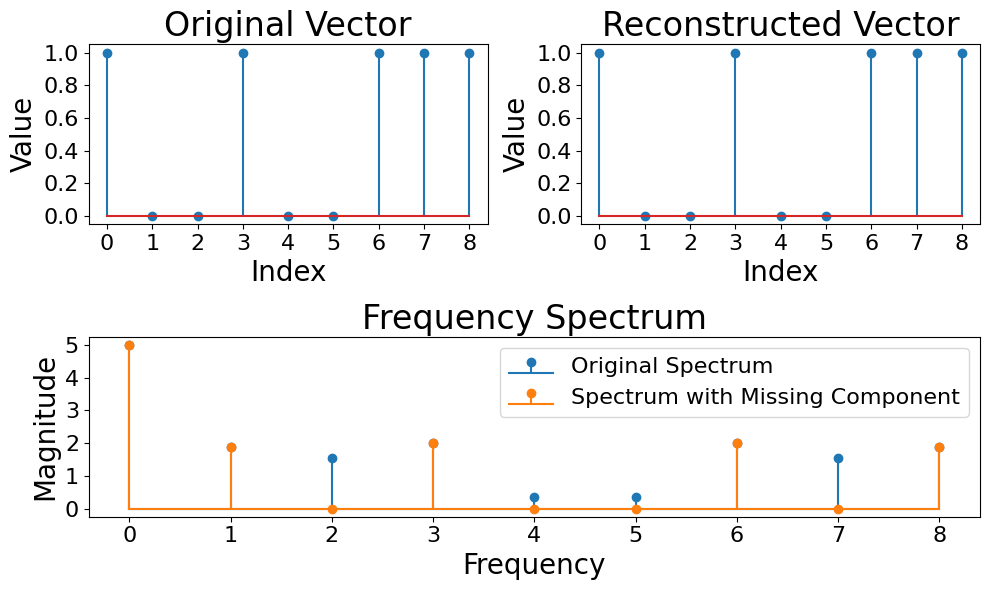

In [4]:

    # Plot original vector and reconstructed vector
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 2, 1)
    plt.stem(v)
    plt.title("Original Vector", fontsize=24)
    plt.xlabel("Index", fontsize=20)
    plt.ylabel("Value", fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    plt.subplot(2, 2, 2)
    plt.stem(reconstructed_v.tolist())
    plt.title("Reconstructed Vector", fontsize=24)
    plt.xlabel("Index", fontsize=20)
    plt.ylabel("Value", fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    # Plot frequency spectrum
    plt.subplot(2, 1, 2)
    plt.stem(np.abs(complex_coeffs), markerfmt="C0o", linefmt="C0-", basefmt="C0-")
    plt.stem(np.abs(complex_coeffs_missing), markerfmt="C1o", linefmt="C1-", basefmt="C1-")
    plt.legend(["Original Spectrum", "Spectrum with Missing Component"], fontsize=16)
    plt.title("Frequency Spectrum", fontsize=24)
    plt.xlabel("Frequency", fontsize=20)
    plt.ylabel("Magnitude", fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    plt.tight_layout()
    plt.savefig("poster_plots.png", dpi=300)

In [ ]:
PS[0]

[(1.0,), (0.0,), (0.0,), (1.0, 0.0), (1.0, 0.0), (0.0, 0.0), (1.0, 0.0, 0.0)]

In [ ]:
def get_flip_sequence(set_size, p_flip):
  n_elements = int(n*np.power(2,n-1))
  flip_sequence = np.random.binomial(n=1, p=p_flip, size=n_elements )
  return flip_sequence

In [ ]:
def corrupt(PS, flip_seq):
  count_i = 0
  count_j = 0
  count_m = 0
  flip_locations = []
  for element in PS:
    for e in element:
      if flip_seq[count_m]:
        flip_locations.append( (count_i, count_j) )
      count_j +=1
      count_m +=1

    count_i += 1
    count_j = 0

  # cause corruption here
  for x in flip_locations:
    if PS[x[0]][x[1]]:
      PS[x[0]][x[1]] = 0
    else:
      PS[x[0]][x[1]] = 1

  return PS


In [ ]:
def get_corrupted_powersets(set_,set_size,p_flip):
  PS = getPowerSet(set_,set_size)
  flip_seq = get_flip_sequence(set_size,p_flip)
  n = len(PS.keys)
  PS_corrupted = {}
  for i in range(n):
    PS_corrupted[i] = corrupt(PS[i],flip_seq)

  return PS_corrupted

v=[0,1,1,1,1,0,1,0,0,1,0]
get_corrupted_powersets(v,3,0.5)
print(PS_corrupted)


NameError: ignored

In [ ]:
#Convert complex number to binary number.
#=============================================

#=============================================
|def complex_list_to_binary(complex_list):
    binary_list = []
    for num in complex_list:
        real_part = num.real
        imaginary_part = num.imag

        # Convert real and imaginary parts to binary
        real_binary = bin(int(real_part))[2:]
        imaginary_binary = bin(int(imaginary_part))[2:]

        binary_list.append((real_binary, imaginary_binary))

    return binary_list

def binary_to_complex_list(binary_list):
    complex_list = []
    for real_binary, imaginary_binary in binary_list:
        # Convert binary to integer and then to float
        real_part = float(int(real_binary, 2))
        imaginary_part = float(int(imaginary_binary, 2))

        # Create complex number
        complex_num = complex(real_part, imaginary_part)
        complex_list.append(complex_num)

    return complex_list

# Example
#complex_numbers = [1 + 2j, 3 + 4j, 5 + 6j, 7 + 8j, 9 + 10j, 11 + 12j, 13 + 14j, 15 + 16j, 17 + 18j, 19 + 20j]

# Convert complex numbers to binary
binary_list = complex_list_to_binary(g)
print("Binary representation:", binary_list)

# Convert binary back to complex numbers
#reconstructed_complex_numbers = binary_to_complex_list(binary_list)
#print("Reconstructed complex numbers:", reconstructed_complex_numbers)

Binary representation: [('101', '0'), ('10', '11'), ('0', '1'), ('0', '0'), ('0', '0'), ('0', '0'), ('0', '0'), ('0', '0'), ('0', '0'), ('0', '0'), ('0', '0'), ('0', 'b1'), ('10', 'b11')]


# import numpy as np

# def complex_list_to_binary(complex_list, bits=16):
#     binary_list = []
#     for num in complex_list:
#         real_part = num.real
#         imaginary_part = num.imag

#         # Convert real and imaginary parts to binary
#         real_binary = np.binary_repr(int(real_part * (2**bits)), width=bits)
#         imaginary_binary = np.binary_repr(int(imaginary_part * (2**bits)), width=bits)

#         binary_list.append((real_binary, imaginary_binary))

#     return binary_list

# def binary_to_complex_list(binary_list, bits=16):
#     complex_list = []
#     for real_binary, imaginary_binary in binary_list:
#         # Convert binary to float
#         real_part = int(real_binary, 2) / (2**bits)
#         imaginary_part = int(imaginary_binary, 2) / (2**bits)

#         # Create complex number
#         complex_num = complex(real_part, imaginary_part)
#         complex_list.append(complex_num)

#     return complex_list

# # Example
# complex_numbers = [
#     -0.04 + 2.77514551e-03j, -0.00263932 - 3.63271264e-03j,
#     -0.00118034 + 2.71441227e-02j, 0.03354102 - 1.53884177e-02j,
#     -0.02618034 + 1.90211303e-02j, -0.00854102 + 2.35114101e-02j,
#     -0.015 - 4.16749733e-02j, -0.06118034 + 3.63271264e-03j,
#     -0.02354102 + 6.96766631e-02j, -0.03618034 - 2.62865556e-02j
# ]

# # Convert complex numbers to binary
# binary_list = complex_list_to_binary(complex_numbers, bits=16)
# print("Binary representation:", binary_list)

# # Convert binary back to complex numbers
# reconstructed_complex_numbers = binary_to_complex_list(binary_list, bits=16)
# print("Reconstructed complex numbers:", reconstructed_complex_numbers)

In [ ]:
#thresholds the complex values of fourier coefficients into binary values
z=(np.abs(y) > 0.01).astype('int64')

In [ ]:
import numpy as np

def complex_list_to_binary(complex_list, bits=256):
    binary_list = []
    for num in complex_list:
        real_part = num.real
        imaginary_part = num.imag

        # Convert real and imaginary parts to binary (two's complement)
        real_binary = np.binary_repr(np.longlong(real_part * (2**bits)), width=bits)
        imaginary_binary = np.binary_repr(np.longlong(imaginary_part * (2**bits)), width=bits)

        binary_list.append((real_binary, imaginary_binary))

    return binary_list

def binary_to_complex_list(binary_list, bits=256):
    complex_list = []
    for real_binary, imaginary_binary in binary_list:
        # Convert binary to long (two's complement)
        real_part = int(real_binary, 2)
        imaginary_part = int(imaginary_binary, 2)

        # Handle negative numbers
        if real_part >= 2**(bits - 1):
            real_part -= 2**bits
        if imaginary_part >= 2**(bits - 1):
            imaginary_part -= 2**bits

        # Convert to float
        real_part /= (2**bits)
        imaginary_part /= (2**bits)

        # Create complex number
        complex_num = complex(real_part, imaginary_part)
        complex_list.append(complex_num)

    return complex_list


# Convert complex numbers to binary
binary_list = complex_list_to_binary(g, bits=256)
print("Binary representation:", binary_list)

# Convert binary back to complex numbers
reconstructed_complex_numbers = binary_to_complex_list(binary_list, bits=256)
print("Reconstructed complex numbers:", reconstructed_complex_numbers)

OverflowError: ignored

In [ ]:
# import matplotlib.pyplot as plt

# # Generate x-values for the plot
# x = []
# for i in range(len(z)):
#     x.extend([i, i+1])

# # Generate y-values for the square wave
# y = []
# for i in range(len(z)):
#     y.extend([z[i], z[i]])

# # Plot the square wave
# plt.plot(x, y, drawstyle="steps-post")
# plt.xlabel("Time")
# plt.ylabel("Amplitude")
# plt.title("Square Wave Representation")
# plt.ylim(-0.5, 1.5)
# plt.show()



In [ ]:
#plots original binary and recovered binary v and z as square wave graphs
import matplotlib.pyplot as plt

x = []
for i in range(len(v)):
    x.extend([i, i+1])

# Generate y-values for the square waves
y_v = []
for i in range(len(v)):
    y_v.extend([v[i], v[i]])

y_w = []
for i in range(len(z)):
    y_w.extend([z[i], z[i]])

# Create subplots and plot the square waves
plt.subplot(2, 1, 1)
plt.plot(x, y_v, drawstyle="steps-post")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Square Wave Representation of v")

plt.subplot(2, 1, 2)
plt.plot(x, y_w, drawstyle="steps-post")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Square Wave Representation of z")

plt.tight_layout()
plt.show()

In [ ]:
# import matplotlib.pyplot as plt

# # Input vector
# v = [1,0,0,0,0,0,0,0,1,1,1,1,1]

# # Generate x-values for the plot
# x = []
# for i in range(len(v)):
#     x.extend([i, i+1])

# # Generate y-values for the square wave
# y = []
# for i in range(len(v)):
#     y.extend([v[i], v[i]])

# # Plot the square wave
# plt.plot(x, y, drawstyle="steps-post")
# plt.xlabel("Time")
# plt.ylabel("Amplitude")
# plt.title("Square Wave Representation")
# plt.ylim(-0.5, 1.5)
# plt.show()

In [ ]:
# Compute frequency spectrum
frequency_spectrum= np.abs(g)

print(frequency_spectrum)

# Generate x-values for the frequency spectrum
x = np.arange(len(g))

# Plot the frequency spectrum
plt.stem(x, frequency_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum")
plt.show()



In [ ]:
# H# Create your search Drone
# ## Create a class for a drone which can move in a 2D space within fixed boundaries
# ## The drones perform random walk
# ## There are 2 targets on the ground that we want to track
# ## Deploy 2 drones and stop if both targets are found

# # create a 2D grid space of size L x L, L = 50 (create this in your mind)
# L = 50
# # Create two tuples for each target, specifying the x and y coordinates,
# # 0 < x < L, 0 < y < L
# t1 = tuple(np.random.uniform(0, L, (1,2))[0])
# t2 = tuple(np.random.uniform(0, L, (1,2))[0])
# targets = [t1, t2]


# # create a class for a Drone with attributes: x, y, speed, range
# # and a function called: update_position()
# class Drone:
#   def __init__(self, x,y, speed, rng):
#     self.x = x
#     self.y = y
#     self.speed = speed
#     self.rng = rng

#   def update_position(self):
#     self.x += self.speed*np.random.uniform(-1,1)
#     self.y += self.speed*np.random.uniform(-1,1)

#     m = 10

#     # make sure that: 0 < self.x < L and 0 < self.y < L
#     # HINT: Use if-else
#     # If it is < 0, make it m
#     # If it is > L, make it L - m
#     # m = 10
#     if self.x < 0:
#       self.x = m
#     elif self.x > L:
#       self.x = L - m

#     if self.y < 0:
#       self.y = m
#     elif self.y > L:
#       self.y = L - m

#   def find_target(self):
#     # (self.x, self.y) <---> target's (x,y)
#     for target in targets:
#       distance = np.sqrt( (self.x - target[0])**2 + (self.y - target[1])**2 )
#       if distance < self.rng:
#         print('target found at {}'.format(target))
#         targets.remove(target)

# # Assignment
# # [] print when a new target is found, and stop when all targets are found
# # [] plot the trajectory for each drone


# # Run a loop for time-steps

# drone_list = []
# drone_list.append(Drone(np.random.uniform(0,L),
#                         np.random.uniform(0,L),
#                         np.random.uniform(5,10),
#                         10.0 ))


# drone_list.append(Drone(np.random.uniform(0,L),
#                         np.random.uniform(0,L),
#                         np.random.uniform(5,10),
#                         10.0 ))

# # Dictionaries to save the trajectory of each drone
# X = {}
# Y = {}
# for i, drone in enumerate(drone_list):
#   X[i] = []
#   Y[i] = []

# # Time-loop
# T = 500
# for t in range(T):
#   for i, drone in enumerate(drone_list):
#     drone.update_position()
#     drone.find_target()
#     X[i].append(drone.x)
#     Y[i].append(drone.y)

#   # found all targets
#   if len(targets) == 0:
#     break

# plt.figure()
# for i in range(len(drone_list)):
#   plt.plot(X[i], Y[i], 'x-', label='drone #{}'.format(i))
# plt.legend()
# plt.xlim([0,L])
# plt.ylim([0,L])
# plt.xlabel('x-coordinate')
# plt.ylabel('y-coordinate')
# plt.title('Drone Trajectory')